## HUMBIO51 Assignment Week 8

##  Learning Objectives
***Students should be able to*** 

<li> <a href=#LD>Find variants in linkage disequilibrium (LD) with a target variant using tabix and PLINK.</a></li>
<li> <a href=#LoadTable> Load a data table in .csv format into Python</a></li>
<li> <a href=#Scatter>Make a scatter plot in Python </a></li>
<li> <a href=#GWAS> Interpret data from a genome wide association study (GWAS)</a></li>
 


## Question 1

This question is based off of data from a study in which  researchers performed genome wide association studies (GWAS) on six different types of erythrocyte traits. Erythrocytes are a type of blood cell and the traits were being studied to look for markers of hematological disorders. 

The reference is Ganesh et al. Nature Genetics 41, 1191–1198 (2009) [doi:10.1038/ng.466](https://www.nature.com/articles/ng.466). 



The question will focus on SNP:  rs4895441

For this quesion you will need the variant files from class for the 1000 Genomes Project in the PLINK binary format: 
    
* **/data/project/1kg_phase1_all.bed** -- binary encoding of subject genotypes (do not be fooled by the file extension, this is NOT the 4-column bed file format we have been using). 

* **/data/project/1kg_phase1_all.bim** -- list of all variants in the subject population 
* **/data/project/1kg_phase1_all.fam** -- list of all subject id's in the 1000's genome project

NOTE: Your notes from class 7 on working with pandas dataframes may be helpful for this assignment. 

### Question 1a

In [8]:
#change your working directory to Week_8 
## BEGIN SOLUTION
import os
os.chdir('Week_8')
##END SOLUTION

In [9]:
!pwd

/home/jovyan/humbio51_instructor/Weekly Assignments/Week_8


### Question 1b

In [10]:
#identify all variants that are in linkage disequilibrium with rs4895441 (use the -r2 flag)
## BEGIN SOLUTION
!plink  --bfile /data/project/1kg_phase1_all --r2  --ld-snp rs4895441 --ld-window 10000 --out r.for.rs4895441 --threads 10
##END SOLUTION

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to r.for.rs4895441.log.
Options in effect:
  --bfile /data/project/1kg_phase1_all
  --ld-snp rs4895441
  --ld-window 10000
  --out r.for.rs4895441
  --r2
  --threads 10

15037 MB RAM detected; reserving 7518 MB for main workspace.
39728178 variants loaded from .bim file.
1092 people (525 males, 567 females) loaded from .fam.
Using up to 10 threads (change this with --threads).
Before main variant filters, 1083 founders and 9 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
commands treat these as missing.
Total genotyping rate is 0.999956.
39728178 variants and 1092 people pass filters and QC.
Note: No phenotypes present.
--r2 to r.fo

### Question 1c

In [12]:
#Display the SNPs that are in linkage disequilibrium with rs4895441 using R2 coefficients. 
## BEGIN SOLUTION
!cat r.for.rs4895441.ld
##END SOLUTION

 CHR_A         BP_A                 SNP_A  CHR_B         BP_B                 SNP_B           R2 
     6    135426573             rs4895441      6    135282735            rs61738647     0.201112 
     6    135426573             rs4895441      6    135390836             rs1547247     0.342084 
     6    135426573             rs4895441      6    135402339             rs9399136     0.709403 
     6    135426573             rs4895441      6    135406178             rs1331309     0.716441 
     6    135426573             rs4895441      6    135406182           rs201166925     0.201936 
     6    135426573             rs4895441      6    135411228             rs9376090      0.73923 
     6    135426573             rs4895441      6    135418632            rs66650371     0.690557 
     6    135426573             rs4895441      6    135418916             rs7776054     0.554292 
     6    135426573             rs4895441      6    135419018             rs9399137     0.713957 
     6    135426573 

### Question 1d 

In [14]:
#Identify all variants that are in linkage disequilibrium with rs4895441 (use the -r flag)
## BEGIN SOLUTION
!plink  --bfile /data/project/1kg_phase1_all --r  --ld-snp rs4895441 --ld-window 10000 --out r.for.rs4895441_r --threads 10

##END SOLUTION

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to r.for.rs4895441_r.log.
Options in effect:
  --bfile /data/project/1kg_phase1_all
  --ld-snp rs4895441
  --ld-window 10000
  --out r.for.rs4895441_r
  --r
  --threads 10

15037 MB RAM detected; reserving 7518 MB for main workspace.
39728178 variants loaded from .bim file.
1092 people (525 males, 567 females) loaded from .fam.
Using up to 10 threads (change this with --threads).
Before main variant filters, 1083 founders and 9 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
commands treat these as missing.
Total genotyping rate is 0.999956.
39728178 variants and 1092 people pass filters and QC.
Note: No phenotypes present.
--r to r.

In [15]:
#Display the SNPs that are in linkage disequilibrium with rs4895441 using R coefficients. 
## BEGIN SOLUTION
!cat r.for.rs4895441_r.ld
##END SOLUTION 

 CHR_A         BP_A                 SNP_A  CHR_B         BP_B                 SNP_B            R 
     6    135426573             rs4895441      6    134694516           rs188189266   -0.0227912 
     6    135426573             rs4895441      6    134694549            rs74457991    0.0452472 
     6    135426573             rs4895441      6    134694754           rs142386931    0.0472189 
     6    135426573             rs4895441      6    134694783           rs146767718   -0.0915572 
     6    135426573             rs4895441      6    134694846            rs75775566    0.0266735 
     6    135426573             rs4895441      6    134694869            rs73774005   -0.0887378 
     6    135426573             rs4895441      6    134694923           rs193124800   -0.0227912 
     6    135426573             rs4895441      6    134694941           rs150478598   -0.0510572 
     6    135426573             rs4895441      6    134694993            rs59229286   -0.0887378 
     6    135426573 

### Question 1e 

What do you notice in comparing the -r analysis with the -r2 analysis? Specifically, what filtering threshold is the -r2 analysis applying by default? 


**ANSWER:** 0.2

### Question 1f

In [26]:
#Read the list of SNPs in linkage disequilibrium with rs4895441 with an r^2 > 0.2 
#into a dataframe in Python and print the sorted the list.
#HINT: When reading in the dataframe use the delim_whitespace=True argument. 
## BEGIN SOLUTION
import pandas as pd 
data=pd.read_table("r.for.rs4895441.ld",delim_whitespace=True,header=0,index_col=0) 
data=data.sort_values('R2',ascending=False)
data.head()

##END SOLUTION

,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R2
CHR_A,,,,,,
6,135426573,rs4895441,6,135426573,rs4895441,1.000000
6,135426573,rs4895441,6,135427817,rs9402686,0.961626
6,135426573,rs4895441,6,135427159,rs9389269,0.959031
6,135426573,rs4895441,6,135427144,rs9376092,0.867938
6,135426573,rs4895441,6,135431640,rs9494142,0.766564


### Question 1e

In [22]:
#Use a for loop to print out a list of SNPs in linkage disequilibrium with rs4895441 
#with an R^2 value greater than .8
## BEGIN SOLUTION
numrows=data.shape[0]
for i in range(numrows): 
    #current row 
    cur_row=data.iloc[i] 
    cur_snp=cur_row['SNP_B']
    cur_r=cur_row['R2']
    if cur_r > 0.8:
        print(cur_snp)
##END SOLUTION 

rs4895441
rs9376092
rs9389269
rs9402686


## Question 2

Generate a scatterplot with base pairs (BP_B) along the x-axis and the correlation coefficient (R) along the y-axis. Add the rs text labels to the plot for R^2 above (hint: see Class 15 notebook,but you will need to edit the get labels function to use the R^2 column as input instead of R). 

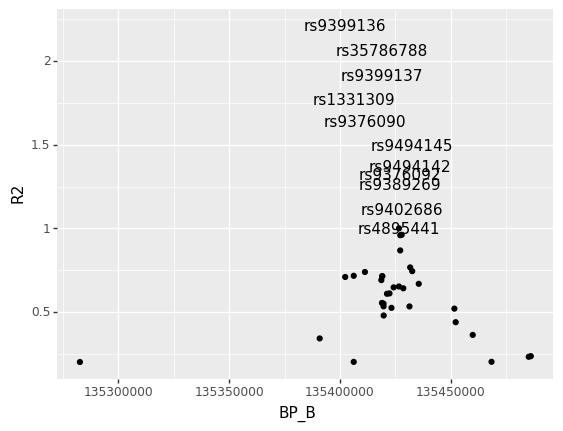

<ggplot: (8780223009989)>

In [38]:
def get_labels(r_thresh,data,r_column="R",snp_b_column="SNP_B",text_offset=0.15): 
    '''
    r_thresh -- the threshold of r (or r^2) to show labels for 
    data -- pandas dataframe with plink  output 
    r_column -- column name in the pandas dataframe where r (or r^2) values are stored. usually this is 'R'
    snp_b_column -- column name in the pandas dataframe where SNP_B is stored. Usually this is 'SNP_B'
    '''
    labels=[]
    x=[]
    y=[]
    offset=0
    for index,row in data.iterrows(): 
        if row[r_column]>=r_thresh:
            labels.append(row[snp_b_column])
            x.append(row['BP_B'])
            y.append(row[r_column]+offset)
            offset=offset+text_offset
        else: 
            labels.append('')
            x.append(row['BP_B'])
            y.append(row[r_column])
    return x,y,labels

## Include labels from column SNP_B so we know which SNPs have the highest LD with our target 
## To keep the plot readable, we only plot labels for SNPs with R > 0.98
x=data['BP_B']
y=data['R2']
label_x,label_y,label_text=get_labels(0.7,data,r_column="R2")
(ggplot(data,aes(x='BP_B',y='R2'))+
 geom_point()+
 geom_text(mapping=aes(x=label_x,y=label_y,label=label_text))+
 xlab("BP_B")+
 ylab("R2"))

## Question 3

In your Week_8 directory there is a file called 'Ganesh_Nat. Genetics_2009_PMID_19862010_ng.466-S2.csv'. 

The file is from the Supplementary Material published in Ganesh et al. Nature Genetics 41, 1191–1198 (2009) doi:10.1038/ng.46. 

The file contains a table of p-values for SNPs that were identified in the GWAS association studies for different traits.

The third column of the file contains the locus or chromosome number. 

### Question 3a

In [41]:
#Read the .csv file from the Ganesh paper into a pandas dataframe. 
#HINT: MAKE SURE YOU ARE READING IN A CSV FILE NOT A TSV FILE. 
## BEGIN SOLUTION
ganesh=pd.read_csv("Ganesh_Nat_Genetics_2009_PMID_19862010_ng.466-S2.csv",header=0)
##END SOLUTION

### Question 3b

In [42]:
#view the dataframe from 3a so you can see the header and columns
## BEGIN SOLUTION
ganesh.head()
##END SOLUTION

,FROM: Nat Genet. 2009 Nov;41(11):1191-8. doi: 10.1038/ng.466. Epub 2009 Oct 11. PMID: 19862010,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Supplementary Table 3: CHARGE meta-analysis re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait
2,1,rs857684,1,156842353,C,T,NaN,OR10Z1;SPTA1;OR10X1;OR6Y1,OR10Z1,t,c,-0.0022,4.00E-04,8.21E-09,-?--,mchc
3,1,rs2479868,1,156846693,C,T,NaN,OR10Z1;SPTA1;OR10X1,SPTA1,t,c,-0.0021,4.00E-04,1.12E-08,-?--,mchc
4,1,rs2157691,1,156849462,G,C,SPTA1,OR10Z1;SPTA1;OR10X1,SPTA1,c,g,-0.0022,4.00E-04,6.05E-09,-?--,mchc


### Question 3c

In [43]:
#Now that you have viewed the .csv file, adjust the skiprows and the header argument to make
#the row with locus#, SNIPID, Chr ... the header and to skip any rows above that. 
## BEGIN SOLUTION
ganesh=pd.read_csv("Ganesh_Nat_Genetics_2009_PMID_19862010_ng.466-S2.csv",skiprows=2,header=0)
##END SOLUTION

### Question 3d

In [44]:
#view the dataframe from 3c so you can see the header and columns
## BEGIN SOLUTION
ganesh.head()
##END SOLUTION

,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait
0,1,rs857684,1,156842353,C,T,NaN,OR10Z1;SPTA1;OR10X1;OR6Y1,OR10Z1,t,c,-0.0022,0.0004,8.210000e-09,-?--,mchc
1,1,rs2479868,1,156846693,C,T,NaN,OR10Z1;SPTA1;OR10X1,SPTA1,t,c,-0.0021,0.0004,1.120000e-08,-?--,mchc
2,1,rs2157691,1,156849462,G,C,SPTA1,OR10Z1;SPTA1;OR10X1,SPTA1,c,g,-0.0022,0.0004,6.050000e-09,-?--,mchc
3,1,rs2518491,1,156851854,C,T,SPTA1,OR10Z1;SPTA1;OR10X1,SPTA1,t,c,-0.0022,0.0004,5.720000e-09,-?--,mchc
4,1,rs2779116,1,156852039,C,T,SPTA1,OR10Z1;SPTA1;OR10X1,SPTA1,t,c,-0.0022,0.0004,5.740000e-09,-?--,mchc


### Question 3e

In [45]:
#Make a subset of the dataframe from question 3d with just the SNPs in locus# 9 
## BEGIN SOLUTION
loc9_snps=ganesh[ganesh['locus#']==9]
##END SOLUTION

### Question 3f

In [50]:
#View the output of 3f 
## BEGIN SOLUTION
loc9_snps.head(50)
##END SOLUTION

,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait
445,9,rs7759398,6,135251527,C,A,NaN,ALDH8A1,ALDH8A1,a,c,-0.0049,0.0008,3.460000e-09,--+--,mcv
446,9,rs7759527,6,135251576,C,T,NaN,ALDH8A1,ALDH8A1,t,c,-0.0050,0.0008,1.910000e-09,--+--,mcv
447,9,rs13192235,6,135388044,G,A,HBS1L,HBS1L,HBS1L,a,g,0.0072,0.0009,6.120000e-15,+++++,mcv
448,9,rs1547247,6,135432529,G,A,NaN,HBS1L,HBS1L,a,g,0.0037,0.0005,5.930000e-12,++-?+,mcv
449,9,rs13220662,6,135437241,G,A,NaN,HBS1L,HBS1L,a,g,0.0055,0.0007,2.370000e-14,++++,mch
450,9,rs13220662,6,135437241,G,A,NaN,HBS1L,HBS1L,a,g,0.0046,0.0005,1.170000e-21,+++++,mcv
451,9,rs9483783,6,135442733,T,C,NaN,HBS1L,HBS1L,t,c,-0.0097,0.0016,2.650000e-09,-----,mcv
452,9,rs9376090,6,135452921,T,C,NaN,HBS1L,HBS1L,t,c,0.1934,0.0311,4.990000e-10,++++++,hct
453,9,rs9376090,6,135452921,T,C,NaN,HBS1L,HBS1L,t,c,-0.0091,0.0008,3.430000e-32,----,mch
454,9,rs9376090,6,135452921,T,C,NaN,HBS1L,HBS1L,t,c,-0.0023,0.0004,2.020000e-09,-?--,mchc


### Question 3g

In [51]:
#Make a subset of the dataframe from question 3e with just the mcv trait
## BEGIN SOLUTION
df_pvalues_locus9_mcv=loc9_snps.loc[loc9_snps.trait=='mcv']
df_pvalues_locus9_mcv.head(50)
##END SOLUTION

,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait
445,9,rs7759398,6,135251527,C,A,NaN,ALDH8A1,ALDH8A1,a,c,-0.0049,0.0008,3.460000e-09,--+--,mcv
446,9,rs7759527,6,135251576,C,T,NaN,ALDH8A1,ALDH8A1,t,c,-0.0050,0.0008,1.910000e-09,--+--,mcv
447,9,rs13192235,6,135388044,G,A,HBS1L,HBS1L,HBS1L,a,g,0.0072,0.0009,6.120000e-15,+++++,mcv
448,9,rs1547247,6,135432529,G,A,NaN,HBS1L,HBS1L,a,g,0.0037,0.0005,5.930000e-12,++-?+,mcv
450,9,rs13220662,6,135437241,G,A,NaN,HBS1L,HBS1L,a,g,0.0046,0.0005,1.170000e-21,+++++,mcv
451,9,rs9483783,6,135442733,T,C,NaN,HBS1L,HBS1L,t,c,-0.0097,0.0016,2.650000e-09,-----,mcv
455,9,rs9376090,6,135452921,T,C,NaN,HBS1L,HBS1L,t,c,-0.0081,0.0005,1.170000e-55,-----,mcv
457,9,rs9389266,6,135453430,G,T,NaN,HBS1L,HBS1L,t,g,-0.0038,0.0006,2.310000e-09,--+--,mcv
458,9,rs9494139,6,135456486,A,G,NaN,HBS1L,HBS1L,a,g,0.0041,0.0007,3.000000e-09,++-?+,mcv
460,9,rs2210366,6,135456901,G,A,NaN,HBS1L,HBS1L,a,g,-0.0052,0.0005,3.260000e-23,--+--,mcv


### Question 3h

For this question, you can take the -log of a dataframe in pandas using the following code:

In [53]:
import numpy


In [ ]:
y=-numpy.log10(df["column name"])
#note: replace 'df' with the name of your dataframe and "column name" with the name of your column of interest 

In [67]:
#Make a scatter plot of the physical position (column name: 'PhysPos') on the x-axis versus 
#the -log10 of the p-value (column name:'P.value') for the SNPs in locus 9 on the y-axis. 
#Make sure to label your axes correctly. 
#Label the points by rs number (note the rs numbers may not be clear to read. We will be posting hints on Canvas for ways to make the plot more readable). 

## BEGIN SOLUTION
#Make a scatter plot of the physical position (column name: 'PhysPos') on the x-axis versus 
#the -log10 of the p-value (column name:'P.value') for the SNPs in locus 9 on the y-axis. 
#Make sure to label your axes correctly. 

def get_labels(threshold,data,y_column="R",label_column="SNP_B",x_column='BP_B',text_offset=0.15): 
    '''
    thresh -- the threshold to show labels for 
    data -- pandas dataframe 
    y_column -- the column where the y axis data is
    x_column -- the column where the x axis data is
    label_column -- column name in the pandas dataframe where SNP_B is stored. Usually this is 'SNP_B'
    '''
    labels=[]
    x=[]
    y=[]
    offset=0
    for index,row in data.iterrows(): 
        if row[y_column]>=threshold:
            labels.append(row[label_column])
            x.append(row[x_column])
            y.append(row[y_column]+offset)
            offset=offset+text_offset
        else: 
            labels.append('')
            x.append(row[x_column])
            y.append(row[y_column])
    return x,y,labels
from plotnine import * 


df_pvalues_locus9_mcv['neglogPval']=-numpy.log10(df_pvalues_locus9_mcv["P.value"])

x=df_pvalues_locus9_mcv['PhysPos']
y=df_pvalues_locus9_mcv['neglogPval']
 

label_x,label_y,label_text=get_labels(40,df_pvalues_locus9_mcv,label_column="SNPID",x_column='PhysPos',y_column='neglogPval')

(ggplot(data,aes(x=x,y=y))+
 geom_point()+
 geom_text(mapping=aes(x=label_x,y=label_y,label=label_text))+
 xlab("PhysPos")+
 ylab("neglogPval"))
##END SOLUTION

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


PlotnineError: 'Aesthetics must either be length one, or the same length as the data'

In [61]:
df_pvalues_locus9_mcv.head()

,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait,neglogPval
445,9,rs7759398,6,135251527,C,A,NaN,ALDH8A1,ALDH8A1,a,c,-0.0049,0.0008,3.460000e-09,--+--,mcv,8.460924
446,9,rs7759527,6,135251576,C,T,NaN,ALDH8A1,ALDH8A1,t,c,-0.0050,0.0008,1.910000e-09,--+--,mcv,8.718967
447,9,rs13192235,6,135388044,G,A,HBS1L,HBS1L,HBS1L,a,g,0.0072,0.0009,6.120000e-15,+++++,mcv,14.213249
448,9,rs1547247,6,135432529,G,A,NaN,HBS1L,HBS1L,a,g,0.0037,0.0005,5.930000e-12,++-?+,mcv,11.226945
450,9,rs13220662,6,135437241,G,A,NaN,HBS1L,HBS1L,a,g,0.0046,0.0005,1.170000e-21,+++++,mcv,20.931814


### Question 3i

Which SNP has the lowest p-value?

Hint: the pandas sort_values() function may be helpful. 

In [71]:
## BEGIN SOLUTION
df_pvalues_sort=df_pvalues_locus9_mcv.sort_values('P.value',ascending=True)
df_pvalues_sort.head()
##END SOLUTION

,locus#,SNPID,Chr,PhysPos,maj_all,min_all,InRefGene,RefGenes60kb,ClosestRefGene,Allele1,Allele2,Effect,StdErr,P.value,Direction,trait,neglogPval
500,9,rs4895441,6,135468266,A,G,NaN,HBS1L,HBS1L,a,g,-0.0080,0.0005,1.000000e-57,-----,mcv,57.000000
513,9,rs9402686,6,135469510,G,A,NaN,HBS1L,HBS1L,a,g,0.0081,0.0005,1.960000e-57,+++++,mcv,56.707744
483,9,rs11759553,6,135463989,A,T,NaN,HBS1L,HBS1L,a,t,-0.0080,0.0005,2.110000e-57,-----,mcv,56.675718
508,9,rs9389269,6,135468852,T,C,NaN,HBS1L,HBS1L,t,c,-0.0081,0.0005,2.280000e-57,-----,mcv,56.642065
495,9,rs4895440,6,135468251,A,T,NaN,HBS1L,HBS1L,a,t,-0.0080,0.0005,4.950000e-57,-----,mcv,56.305395


**YOUR ANSWER HERE**: 